# Reference Manager Citation Errors

12-18-23 KV
2-20-23 KV


In [381]:
# Import needed packages

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
# Read data from where it's entered into CSV

filepath = '/Users/kvrouwenvelder/Library/CloudStorage/OneDrive-AmericanGeophysicalUnion/Documents/Data/Reference-Manager-Work/reference-manager-analysis/'
filename = 'reference-manager-data-v2-'
reference_manager_filenames = ['BibTeX','repo-recommended-citation','Zotero-plugin','Zotero-wizard','BibDesk','Sciwheel-plugin',
                               'SciWheel-wizard','CrossCite','Endnote-plugin','Endnote-wizard','Papers-plugin','Papers-wizard','Paperpile-plugin',
                               'Paperpile-wizard','Mendeley-plugin','Mendeley-wizard','RefWorks-plugin','Refworks-wizard','Export-options']

# import files
bibtex = pd.read_csv(filepath+filename+reference_manager_filenames[0]+'.csv')
repo_recommended_citation = pd.read_csv(filepath+filename+reference_manager_filenames[1]+'.csv')
zotero_plugin = pd.read_csv(filepath+filename+reference_manager_filenames[2]+'.csv')
zotero_wizard = pd.read_csv(filepath+filename+reference_manager_filenames[3]+'.csv')
bib_desk = pd.read_csv(filepath+filename+reference_manager_filenames[4]+'.csv')
sciwheel_plugin = pd.read_csv(filepath+filename+reference_manager_filenames[5]+'.csv')
sciwheel_wizard = pd.read_csv(filepath+filename+reference_manager_filenames[6]+'.csv')
crosscite = pd.read_csv(filepath+filename+reference_manager_filenames[7]+'.csv')
endnote_plugin = pd.read_csv(filepath+filename+reference_manager_filenames[8]+'.csv')
endnote_wizard = pd.read_csv(filepath+filename+reference_manager_filenames[9]+'.csv')
papers_plugin = pd.read_csv(filepath+filename+reference_manager_filenames[10]+'.csv')
papers_wizard = pd.read_csv(filepath+filename+reference_manager_filenames[11]+'.csv')
paperpile_plugin = pd.read_csv(filepath+filename+reference_manager_filenames[12]+'.csv')
paperpile_wizard = pd.read_csv(filepath+filename+reference_manager_filenames[13]+'.csv')
mendeley_plugin = pd.read_csv(filepath+filename+reference_manager_filenames[14]+'.csv')
mendeley_wizard = pd.read_csv(filepath+filename+reference_manager_filenames[15]+'.csv')
refworks_plugin = pd.read_csv(filepath+filename+reference_manager_filenames[16]+'.csv')
refworks_wizard = pd.read_csv(filepath+filename+reference_manager_filenames[17]+'.csv')
export_options = pd.read_csv(filepath+filename+reference_manager_filenames[18]+'.csv')

list_of_ref_managers = [bibtex,repo_recommended_citation,zotero_plugin,zotero_wizard,bib_desk,sciwheel_plugin,
                       sciwheel_wizard,crosscite, endnote_plugin, endnote_wizard, papers_plugin,papers_wizard,paperpile_plugin,
                       paperpile_wizard,mendeley_plugin,mendeley_wizard,refworks_plugin,refworks_wizard]


In [224]:
bibtex.head()

,Repository,DOI,Data-or-software,export-exists,export-file-type,import-meta-type,import-meta-authors,import-meta-title,import-meta-date,import-meta-DOI,import-meta-repo,import-meta-version,import-meta-access-date,count_incorrect_im,count_missing_im,count_correct_im
0,Zenodo,https://doi.org/10.5281/zenodo.10525458,Data,0.0,dataset,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,2,6.0
1,Figshare,https://doi.org/10.6084/m9.figshare.21810366.v7,Data,0.0,article,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,2,5.0
2,PDS,https://doi.org/10.17189/1522849,Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,8,0.0
3,IEDA,https://doi.org/10.26022/IEDA/112300,Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,8,0.0
4,NCAR,https://doi.org/10.5065/MM6J-9282,Data,0.0,misc,1.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,1.0,3,4.0


In [232]:
bibtex['export-file-type'].isna()

0     False
1     False
2      True
3      True
4     False
5      True
6     False
7      True
8     False
9      True
10     True
11    False
12    False
13     True
Name: export-file-type, dtype: bool

# Functions

In [25]:
# Set up input fields

# Define export metadata fields for count_fields

ex_cols = ['export-meta-type', 'export-meta-authors','export-meta-title','export-meta-date','export-meta-DOI',
            'export-meta-repo','export-meta-version','export-meta-access-date']

# Define import metadata fields for count_fields
im_cols = ['import-meta-type', 'import-meta-authors','import-meta-title','import-meta-date','import-meta-DOI',
            'import-meta-repo','import-meta-version','import-meta-access-date']


In [26]:
# Count correct, missing, incorrect metadata fields for each repository and reference manager (add cols to df)

def count_fields(input_df,cols,col_type):
    input_df['count_incorrect_'+col_type]=input_df[cols].sum(axis=1, numeric_only=True) # add a column to df with count "incorrect"
    input_df['count_missing_'+col_type]= input_df[cols].isna().sum(axis=1, numeric_only=True) # add a column to df with count 'missing'
    # The count correct is len(cols) - (# incorrect + # missing)
    input_df['count_correct_'+col_type] = len(cols) - (input_df['count_incorrect_'+col_type]+input_df['count_missing_'+col_type])
    return input_df


In [27]:
# Count correct, missing, incorrect across all REFERENCE MANAGERS

def sum_across_repos(list_of_dfs, cols, col_type): 
    # list_of_dfs is df names you wish to analyze; cols is list of columns to analyze; col_type is "ex" or "im"
    
    # init full sums
    one_sum = np.zeros(3)
    full_sums = np.tile(one_sum, (len(list_of_dfs), 1))
    for i in range(len(full_sums)):
        full_sums[i] = np.zeros(3)
    

    iter = 0 #start counter
    
    for df in list_of_dfs: # go through list of dfs
        count_fields(df, cols, col_type)
        sum_incorrect = np.sum(df['count_incorrect_' + col_type]) # this will be the first list element in return
        sum_missing = np.sum(df['count_missing_' + col_type]) # This will be the second list element in return
        sum_correct = np.sum(df['count_correct_' + col_type]) #this will be the 3rd list element in return
        sums = [sum_incorrect, sum_missing, sum_correct]
        full_sums[iter] = sums
        iter += 1
    
    return full_sums
    
# print(full_sums[0][1]) # access an individual element in this list using list[rows][columns]


In [28]:
# Count correct, missing, incorrect across all REPOSITORIES

def sum_across_refmans(list_of_dfs, cols, col_type): 
    # list_of_dfs is df names you wish to analyze; cols is list of columns to analyze; col_type is "ex" or "im"
    
    # init full sums df
    # Number of rows will = # repos in this list
    data = {str('sum_incorrect_'+col_type): np.zeros(len(repo_recommended_citation['Repository'])), #init w zeros
        str('sum_missing_'+col_type): np.zeros(len(repo_recommended_citation['Repository'])),
        str('sum_correct_'+col_type): np.zeros(len(repo_recommended_citation['Repository']))}


    full_sums_df = pd.DataFrame(data) # make empty df 
    full_sums_df['Repository'] = repo_recommended_citation['Repository'] # Add repository column
    
    for df in list_of_dfs: # go through list of dfs
        count_fields(df, cols, col_type) #returns that dataframe with the 3 sums added
        
        #add sum of each new column to existing dataframe
        full_sums_df['sum_incorrect_'+col_type] += df['count_incorrect_'+col_type]
        full_sums_df['sum_missing_'+col_type] += df['count_missing_'+col_type]
        full_sums_df['sum_correct_'+col_type] += df['count_correct_'+col_type]
    
    return full_sums_df
    

In [29]:
# Sum across all import and export fields and return incorrect, missing, and correct sums

def sum_across_fields(list_of_dfs): 
    
    #initialize store_data

    data = {'sum_incorrect': np.zeros(24), # set based on # of columns in endnote_plugin
           'sum_missing': np.zeros(24),
           'sum_correct': np.zeros(24)}

    # run for first dataset in list_of_dfs to set correct indices for dataframe:

    data['sum_incorrect'] = list_of_dfs[0].sum(axis=0, numeric_only=True) # sum incorrect
    data['sum_missing'] = list_of_dfs[0].isna().sum(axis=0, numeric_only=True) # sum missing
    data['sum_correct'].fill(len(list_of_dfs)*len(zotero_plugin['Repository'])) # sum correct; fill with total value possible for all fields! 

    # itera = 0

    # iterate through list of dfs, excluding that first one

    for df in list_of_dfs[1:]:
        data['sum_incorrect'] += df.sum(axis=0, numeric_only=True) # sum incorrect
        data['sum_missing'] += df.isna().sum(axis=0, numeric_only=True) # sum missing

        # itera += 1
        # print(itera) # just to check how far the loop makes it

    # Calculate sum_correct as the total possible fields minus incorrect and missing sums
    data['sum_correct'] = data['sum_correct'] - (data['sum_incorrect']+data['sum_missing'])

    # create dataframe
    store_data = pd.DataFrame(data)

    # Note I checked this output using the export-meta-access-date column. sum_correct here is 25
    # and looking at the source data, this matches the number of "0" codes we recorded!

    return store_data

# Repository recommended citation
* How many repositories offer a recommended citation? 
* How many repositories offer a recommended citation that is correct when compared to DataCite metadata?
* How many repositories define a citation style? 
* How many repositories offer an opportunity to change the citation style to what journal requires?

3 repositories specify a citation style (APA).


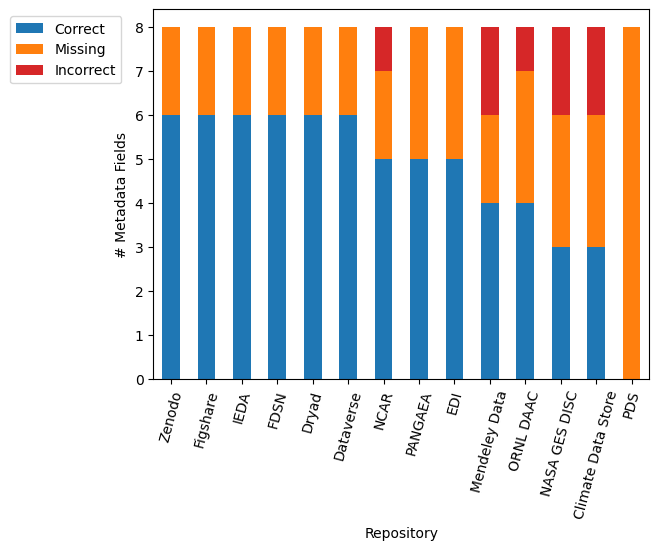

In [30]:
filename2 = 'repository-recommended-citation'

# Count the correct , incorrect, missing fields - Export Only
count_fields(repo_recommended_citation, ex_cols,'ex')

# How many repositories specify citation style?

num_repo_citation_style = len(repo_recommended_citation[repo_recommended_citation['Citation-style']=='APA'])
print(str(num_repo_citation_style)+' repositories specify a citation style (APA).')

# Create a stacked bar graph with correct, incorrect, missing fields for each repository

## Sort df by most correct fields
repo_recommended_citation_sort = repo_recommended_citation.sort_values(['count_correct_ex'], ascending = False)

## Start graphing
ax = repo_recommended_citation_sort.plot.bar(x = 'Repository', y = ['count_correct_ex','count_missing_ex','count_incorrect_ex'], stacked = True, label = ['Correct', 'Missing','Incorrect'],
                                            color = ['tab:blue','tab:orange','tab:red'])
plt.ylabel('# Metadata Fields')
plt.xticks(rotation = 75)
ax.legend(bbox_to_anchor = (-0.05, 1))


# need to adjust colors, font sizes, rotation of x labels, graph shape, etc.

# Save CSV

repo_recommended_citation_sort.iloc[:,[0,5,6,7,8,9,10,11,12,13,14,15]].to_csv(str(filepath+filename+filename2+'.csv')) # Save CSV of df with graph data

# Save fig
ax.figure.savefig((filepath+filename+filename2+'_vert'+'.png'),dpi=300,bbox_inches='tight')


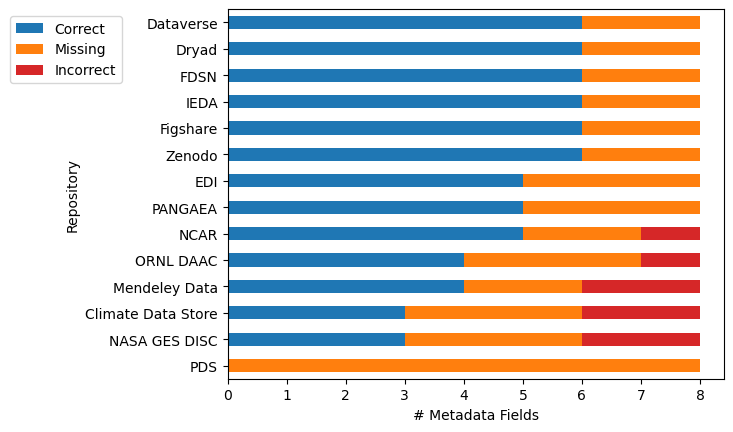

In [31]:
# Horizonal bar graph of repository recommended citation

## Sort df by most correct fields
repo_recommended_citation_sort2 = repo_recommended_citation.sort_values(['count_correct_ex'], ascending = True)

# Graph
ax = repo_recommended_citation_sort2.plot.barh(x = 'Repository', y = ['count_correct_ex','count_missing_ex','count_incorrect_ex'], stacked = True, label = ['Correct', 'Missing','Incorrect'],
                                            color = ['tab:blue','tab:orange','tab:red'])
plt.xlabel('# Metadata Fields')
#ax.legend(loc = 'upper right',framealpha=1)
ax.legend(bbox_to_anchor = (-0.2, 1))

plt.show()

# Save fig
ax.figure.savefig((filepath+filename+filename2+'_horiz'+'.png'),dpi=300,bbox_inches='tight')


# Graph correct fields across all repositories
* For each reference manager, what are the # of correct fields across all repositories?

This can be done for either the import or export fields.


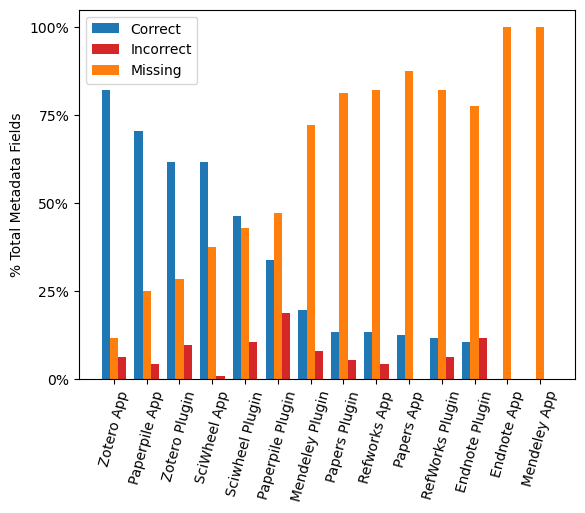

In [32]:
# Filename

filename2 = 'correct-fields-all-repos'

# Must exclude crosscite for import
# Also exclude bib_desk (import used for something different)

list_of_dfs = (zotero_plugin,zotero_wizard,sciwheel_plugin, sciwheel_wizard, 
             endnote_plugin, endnote_wizard, papers_plugin,papers_wizard,paperpile_plugin,paperpile_wizard,mendeley_plugin,
               mendeley_wizard,refworks_plugin,refworks_wizard)

# Get list of reference-manager-filename indices to add to repo-import-sums-df
list_of_indices = reference_manager_filenames[2:4]+reference_manager_filenames[5:7]+reference_manager_filenames[8:-1]



repo_import_sums = sum_across_repos(list_of_dfs, im_cols, 'im')

repo_import_sums_df = pd.DataFrame(data = repo_import_sums, index = list_of_indices, columns = ['sum_incorrect', 'sum_missing', 'sum_correct'])
repo_import_sums_df_sort = repo_import_sums_df.sort_values(by=['sum_correct'],ascending = False)



# Make graph 

fig, ax = plt.subplots()
x = np.arange(len(list_of_dfs)) # of reference managers
y = 14*8 # Max value possible for repo_export_sums for each ref manager. 14 repos, 8 fields per repo

# Get xlabels from index and fix them up
xlabels = repo_import_sums_df_sort.index.str.replace('-',' ') # Use labels from repo_import_sums_df_SORT index and remove hyphen
xlabels = xlabels.str.replace('wizard','App') # change wizard to App
xlabels = xlabels.str.replace('plugin','Plugin') # fix capitalization

ylabels = ['0%','25%','50%','75%','100%']

offset = 0.25
width = 0.25

# to get percentages: df[sum_column]/y*100

# Graph all
ax.bar(x - offset, (repo_import_sums_df_sort['sum_correct']/y*100), width = width, label = 'Correct', color = 'tab:blue')
ax.bar(x + offset, (repo_import_sums_df_sort['sum_incorrect']/y*100), width = width, label = 'Incorrect', color = 'tab:red')
ax.bar(x, (repo_import_sums_df_sort['sum_missing']/y*100), width = width, label = 'Missing', color = 'tab:orange')

# set labels and ticks and axes
ax.set_xticks(x,xlabels, rotation = 75) # Either use repo_import_sums_df_sort.index for labels or new string, 'labels'
ax.set_yticks([0,25,50,75,100],ylabels) # Either [0,y/4,y/2,3*y/4,y] for raw # metadata fields or [0, 25, 50, 100] for %
ax.set_ylabel('% Total Metadata Fields')
ax.legend()

plt.show()

# Save CSV

repo_import_sums_df_sort.to_csv(str(filepath+filename+filename2+'.csv')) # Save CSV of df with graph data

# Save fig

fig.savefig((filepath+filename+filename2+'_vert'+'.png'),dpi=300,bbox_inches='tight')


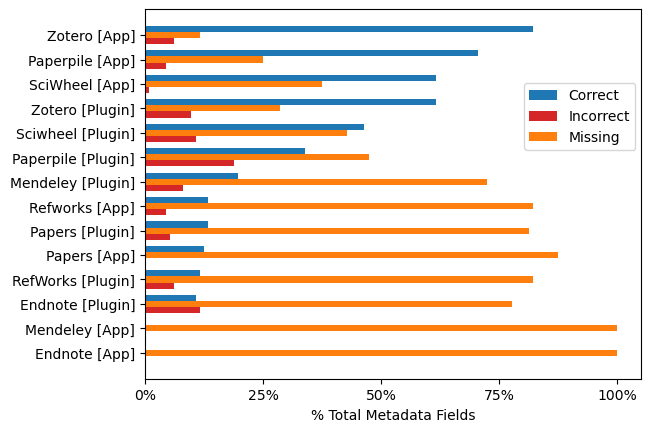

In [33]:
# Horizontal version

# Sort ascending = True to put correct values at top
repo_import_sums_df_sort = repo_import_sums_df.sort_values(by=['sum_correct'],ascending = True)

# Make graph 

fig, ax = plt.subplots()
x = np.arange(len(list_of_dfs)) # of reference managers
y = 14*8 # Max value possible for repo_export_sums for each ref manager. 14 repos, 8 fields per repo

# Get xlabels from index and fix them up
xlabels = repo_import_sums_df_sort.index.str.replace('-',' ') # Use labels from repo_import_sums_df_SORT index and remove hyphen
xlabels = xlabels.str.replace('wizard','[App]') # change wizard to App
xlabels = xlabels.str.replace('plugin','[Plugin]') # fix capitalization

ylabels = ['0%','25%','50%','75%','100%']

offset = 0.25
width = 0.25

# to get percentages: df[sum_column]/y*100

# Graph all
ax.barh(x + offset, (repo_import_sums_df_sort['sum_correct']/y*100), width, label = 'Correct', color = 'tab:blue')
ax.barh(x - offset, (repo_import_sums_df_sort['sum_incorrect']/y*100),width, label = 'Incorrect', color = 'tab:red')
ax.barh(x, (repo_import_sums_df_sort['sum_missing']/y*100), width,label = 'Missing', color = 'tab:orange')

# set labels and ticks and axes
ax.set_yticks(x,xlabels, rotation = 0) # Either use repo_import_sums_df_sort.index for labels or new string, 'labels'
ax.set_xticks([0,25,50,75,100],ylabels) # Either [0,y/4,y/2,3*y/4,y] for raw # metadata fields or [0, 25, 50, 100] for %
ax.set_xlabel('% Total Metadata Fields')
ax.legend(bbox_to_anchor=(0.75, 0.6))

plt.show()

# Save fig

fig.savefig((filepath+filename+filename2+'_horiz'+'.png'),dpi=300,bbox_inches='tight')


# Bibtex
* How many repositories offer Bibtex exports and in what formats?
* Are Bibtex fields correct? 

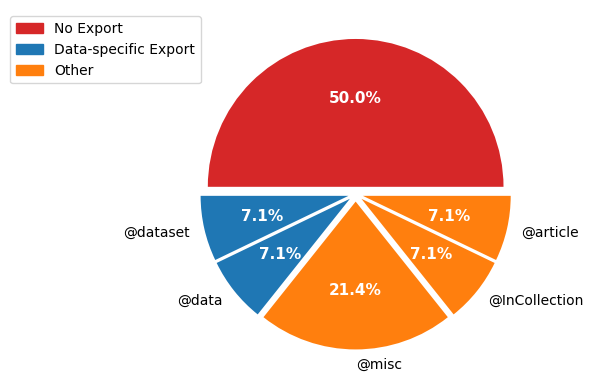

In [34]:
# First how many repos offer Bibtex exports

# filename
filename2 = 'bibtex'
# Count whether there is a bibtex export or not

# no bibtex
sum_no_bibtex = np.sum(bibtex['export-exists'].isna())
sum_bibtex = len(bibtex['export-exists'])-sum_no_bibtex

# Filter by type
bibtex_na = bibtex[bibtex['export-exists'].isna()]
bibtex_dataset = bibtex[bibtex['export-file-type']=='dataset']
bibtex_misc = bibtex[bibtex['export-file-type'].str.contains('misc', na=False)]
bibtex_data = bibtex[bibtex['export-file-type']=='data']
bibtex_incoll = bibtex[bibtex['export-file-type'].str.contains('incollection', na=False)]
bibtex_article = bibtex[bibtex['export-file-type'].str.contains('article', na=False)]


# # bar chart for bibtex or NO
# fig, ax = plt.subplots()
# ax.bar([1,2], [sum_bibtex, sum_no_bibtex], label = 'Correct')

labels = ['','@dataset','@data','@misc','@InCollection','@article']
sizes = [len(bibtex_na['export-exists']), len(bibtex_dataset['export-exists']),
         len(bibtex_data['export-exists']),len(bibtex_misc['export-exists']),
         len(bibtex_incoll['export-exists']),len(bibtex_article['export-exists'])]
colors = ['tab:red','tab:blue','tab:blue','tab:orange','tab:orange','tab:orange'] # colors corresp. to correctness

# set explode
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05)

# Plot pie chart
fig1, ax1 = plt.subplots()
patches, texts, autotexts = ax1.pie(sizes, explode = explode, labels=labels, autopct='%1.1f%%', colors = colors)

# set inside label parameters: color, size, weight
# Color = white
for autotext in autotexts: 
    autotext.set_color('white')

# weight and size
plt.setp(autotexts, size=11, weight = 'bold')

# legend
import matplotlib.patches as mpatches

red_patch = mpatches.Patch(color='tab:red', label='No Export')
blue_patch = mpatches.Patch(color = 'tab:blue', label = 'Data-specific Export')
orange_patch = mpatches.Patch(color = 'tab:orange', label = 'Other')

ax1.legend(handles=[red_patch, blue_patch, orange_patch],bbox_to_anchor = (0.1, 1))
    
# show graph
plt.show()

# Save fig

fig.savefig((filepath+filename+filename2+'_pie'+'.png'),dpi=300,bbox_inches='tight')



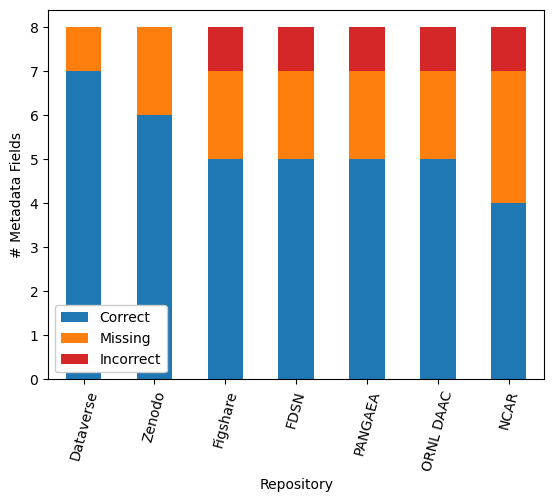

In [35]:
# Filename

filename2 = 'bibtex-fields-by-repo'

# Count the correct , incorrect, missing fields - Import Only
count_fields(bibtex, im_cols,'im')


# Sort fields (filter by only repos offering bibtex export and sort by # correct)
bibtex_sort = bibtex.loc[bibtex['export-exists']==0.0].sort_values(by=['count_correct_im'],ascending = False)

# Graph
ax2 = bibtex_sort.plot.bar(x = 'Repository', y = ['count_correct_im','count_missing_im','count_incorrect_im'], 
                           stacked = True, 
                           label = ['Correct', 'Missing','Incorrect'],
                          color = ['tab:blue','tab:orange','tab:red'])
plt.ylabel('# Metadata Fields')

# Get x labels
ax2.legend(loc = 'lower left',framealpha=1)
ax2.set_xticks(np.arange(7), labels = bibtex_sort['Repository'],rotation=75)
plt.show()

# Save CSV

bibtex_sort.to_csv(str(filepath+filename+filename2+'.csv')) # Save CSV of df with graph data

# Save fig
fig.savefig((filepath+filename+filename2+'_bar'+'.png'),dpi=300,bbox_inches='tight')


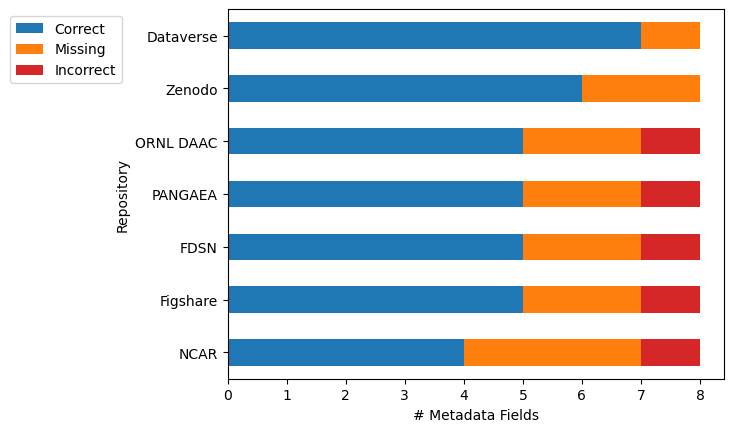

In [37]:
# Horizontal version

# Sort fields (filter by only repos offering bibtex export and sort by # correct)
bibtex_sort2 = bibtex.loc[bibtex['export-exists']==0.0].sort_values(by=['count_correct_im'],ascending = True)

# Graph
ax2 = bibtex_sort2.plot.barh(x = 'Repository', y = ['count_correct_im','count_missing_im','count_incorrect_im'], 
                           stacked = True, 
                           label = ['Correct', 'Missing','Incorrect'],
                          color = ['tab:blue','tab:orange','tab:red'])
plt.xlabel('# Metadata Fields')

# Get x labels
ax2.legend(bbox_to_anchor = (-0.2, 1))

plt.show()

# Save fig

fig.savefig((filepath+filename+filename2+'_bar_horiz'+'.png'),dpi=300,bbox_inches='tight')


# Best Repository Citation Metadata

* are there any repositories that are performing exceptionally well across reference managers?

Use import data and sum across sheets - how many '0s'. 


Could also break out the 8 metadata fields on a by-repository basis and count across the sheets for a single repository for each field, but this would be pretty challenging to graph

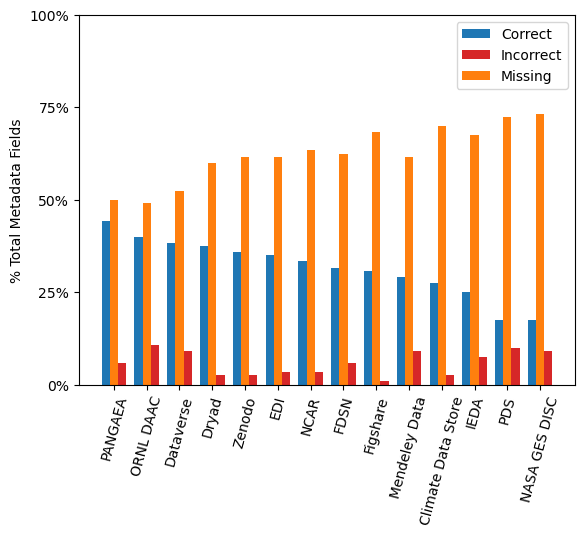

In [38]:
# Filename

filename2 = 'repo-metadata-across-refmans'

# Must exclude crosscite for import
# Bibdesk is also excluded

list_of_dfs = (zotero_plugin,zotero_wizard,bib_desk,sciwheel_plugin, sciwheel_wizard, 
               endnote_wizard, endnote_plugin, papers_plugin,papers_wizard,paperpile_plugin,paperpile_wizard,mendeley_plugin,
               mendeley_wizard,refworks_wizard, refworks_plugin)

# Get repository metadata field sums across reference managers
refman_import_sums = sum_across_refmans(list_of_dfs, im_cols, 'im')


# Set labels
ylabels = ['0%','25%','50%','75%','100%']

# Sort values
refman_import_sums_sort = refman_import_sums.sort_values(by=['sum_correct_im'],ascending = False)

# Make graph
fig, ax = plt.subplots()
x = np.arange(14)

y = len(list_of_dfs)*8 # Max value possible for refman_sums for each ref manager

# Percents are df[sum_column]/y*100

offset = 0.25
width = 0.25
ax.bar(x - offset, (refman_import_sums_sort['sum_correct_im']/y*100), width = width, label = 'Correct', color = 'tab:blue')
ax.bar(x + offset, (refman_import_sums_sort['sum_incorrect_im']/y*100), width = width, label = 'Incorrect', color = 'tab:red')
ax.bar(x, (refman_import_sums_sort['sum_missing_im']/y*100), width = width, label = 'Missing', color = 'tab:orange')

# set labels and ticks and axes
ax.set_xticks(x,refman_import_sums_sort['Repository'], rotation = 75) # Use Repository column
ax.set_yticks([0,(y/y)/4*100,(y/y)/2*100,3*(y/y)/4*100,y/y*100],ylabels)
ax.set_ylabel('% Total Metadata Fields')
ax.legend()

plt.show()

# Save CSV

refman_import_sums.to_csv(str(filepath+filename+filename2+'.csv')) # Save CSV of df with graph data

# Save fig
fig.savefig((filepath+filename+filename2+'_vert'+'.png'),dpi=300,bbox_inches='tight')


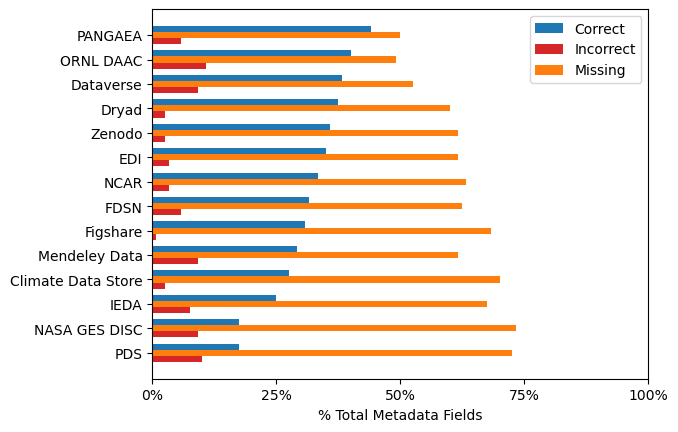

In [39]:
# Horizontal version

# Sort values
refman_import_sums_sort2 = refman_import_sums.sort_values(by=['sum_correct_im'],ascending = True)

# Make graph
fig, ax = plt.subplots()
x = np.arange(14)

y = len(list_of_dfs)*8 # Max value possible for refman_sums for each ref manager

# Percents are df[sum_column]/y*100

offset = 0.25
width = 0.25
ax.barh(x + offset, (refman_import_sums_sort2['sum_correct_im']/y*100), width, label = 'Correct', color = 'tab:blue')
ax.barh(x - offset, (refman_import_sums_sort2['sum_incorrect_im']/y*100), width, label = 'Incorrect', color = 'tab:red')
ax.barh(x, (refman_import_sums_sort2['sum_missing_im']/y*100), width, label = 'Missing', color = 'tab:orange')

# set labels and ticks and axes
ax.set_yticks(x,refman_import_sums_sort2['Repository']) # Use Repository column
ax.set_xticks([0,(y/y)/4*100,(y/y)/2*100,3*(y/y)/4*100,y/y*100],ylabels)
ax.set_xlabel('% Total Metadata Fields')
ax.legend(bbox_to_anchor = (1.,1))

plt.show()

# Save fig

fig.savefig((filepath+filename+filename2+'_horiz'+'.png'),dpi=300,bbox_inches='tight')


# Most common errors by metadata field

* by import
* by export



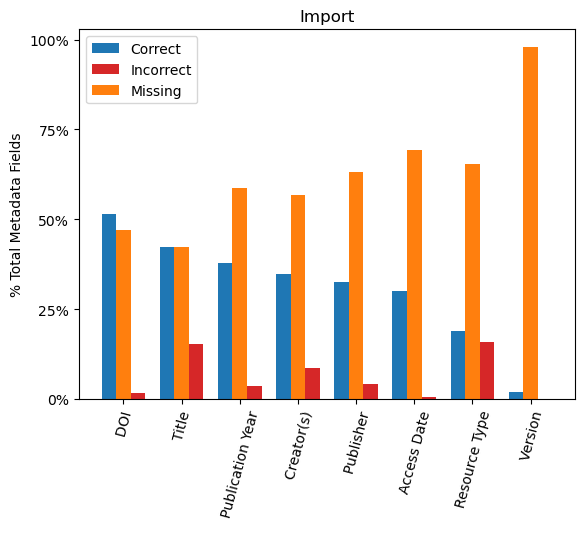

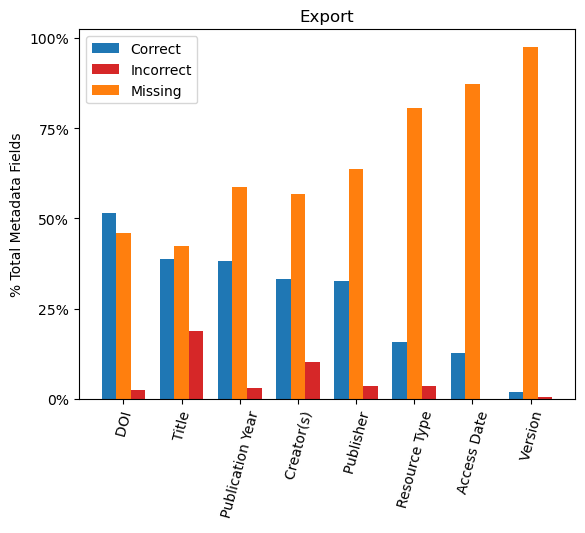

In [40]:
# set filename

filename2 = 'errors-by-field'

# list dfs to include

# should NOT include cross cite? 
# should ALSO not include BibDesk as import type field is used for something else

list_of_dfs = (zotero_plugin,zotero_wizard,sciwheel_plugin, sciwheel_wizard, endnote_wizard, endnote_plugin, 
               papers_plugin,papers_wizard,paperpile_plugin,paperpile_wizard,mendeley_plugin,
               mendeley_wizard,refworks_wizard, refworks_plugin)

# Get df with sum incorrect, missing, and correct for each metadata field by import and export

store_data = sum_across_fields(list_of_dfs)

# For both export and import, graph as a stack correct, incorrect, missing for each metadata field

# Common parameters for graphing

x = np.arange(8) # of metadata fields
y = len(list_of_dfs)*len(zotero_plugin['Repository']) # total possible correct fields, len list of dfs * 14 repositories

## Start graphing IMPORT

# first sort import
import_sort = store_data.loc['import-meta-DOI':'import-meta-version'].sort_values(by = 'sum_correct',ascending = False)

fig, ax = plt.subplots()

offset = 0.25
width = 0.25
ax.bar(x - offset, (import_sort['sum_correct']/y*100), width = width, label = 'Correct', color = 'tab:blue')
ax.bar(x + offset, (import_sort['sum_incorrect']/y*100), width = width, label = 'Incorrect', color = 'tab:red')
ax.bar(x, (import_sort['sum_missing']/y*100), width = width, label = 'Missing', color = 'tab:orange')

# Get labels and clean them up
xlabels = import_sort.index #labels will be import_sort.index Prev store_data index DOI thru version. Import is 16:24
xlabels = xlabels.str.replace('-',' ') # replace hyphen
xlabels = xlabels.str.replace('import','') #don't include 'import'
xlabels = xlabels.str.replace('repo','Publisher')
xlabels = xlabels.str.replace('title','Title') 
xlabels = xlabels.str.replace('meta date','Publication Year') 
xlabels = xlabels.str.replace('authors','Creator(s)') 
xlabels = xlabels.str.replace('access date','Access Date') 
xlabels = xlabels.str.replace('type','Resource Type') 
xlabels = xlabels.str.replace('version','Version') 
xlabels = xlabels.str.replace('meta','') #don't include 'meta'



# set labels and ticks and axes

ax.set_xticks(x,xlabels, rotation = 75) # Use xlabels or index
ax.set_yticks([0,(y/y)/4*100,(y/y)/2*100,3*(y/y)/4*100,y/y*100],ylabels)
ax.set_ylabel('% Total Metadata Fields')
ax.legend()
plt.title('Import')

plt.show()

# Save fig

fig.savefig((filepath+filename+filename2+'_import_vert'+'.png'),dpi=300,bbox_inches='tight')

## Start graphing EXPORT 

# first sort export
export_sort = store_data.loc['export-meta-DOI':'export-meta-version'].sort_values(by = 'sum_correct',ascending = False)

fig, ax = plt.subplots()

offset = 0.25
width = 0.25
ax.bar(x - offset, (export_sort['sum_correct']/y*100), width = width, label = 'Correct', color = 'tab:blue')
ax.bar(x + offset, (export_sort['sum_incorrect']/y*100), width = width, label = 'Incorrect', color = 'tab:red')
ax.bar(x, (export_sort['sum_missing']/y*100), width = width, label = 'Missing', color = 'tab:orange')

# Get labels and clean them up
xlabels = export_sort.index #labels will be export_sort index Prev store_data index DOI thru version. Export is 7:15
xlabels = xlabels.str.replace('-',' ') # replace hyphen
xlabels = xlabels.str.replace('export','') #don't include 'export'
xlabels = xlabels.str.replace('repo','Publisher')
xlabels = xlabels.str.replace('title','Title') 
xlabels = xlabels.str.replace('meta date','Publication Year') 
xlabels = xlabels.str.replace('authors','Creator(s)') 
xlabels = xlabels.str.replace('access date','Access Date') 
xlabels = xlabels.str.replace('type','Resource Type') 
xlabels = xlabels.str.replace('version','Version') 
xlabels = xlabels.str.replace('meta','') #don't include 'meta'

# set labels and ticks and axes
ax.set_xticks(x,xlabels, rotation = 75) # Use xlabels or index
ax.set_yticks([0,(y/y)/4*100,(y/y)/2*100,3*(y/y)/4*100,y/y*100],ylabels)
ax.set_ylabel('% Total Metadata Fields')
ax.legend()
plt.title('Export')

plt.show()

# Save fig

fig.savefig((filepath+filename+filename2+'_export_vert'+'.png'),dpi=300,bbox_inches='tight')

# Save CSV for both

store_data.to_csv(str(filepath+filename+filename2+'.csv')) # Save CSV of df with graph data


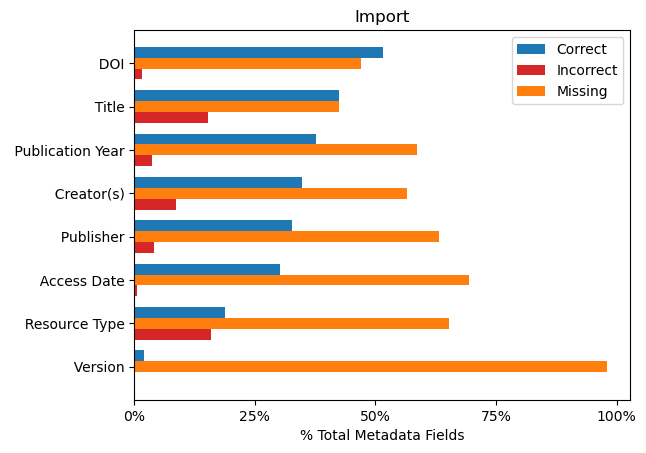

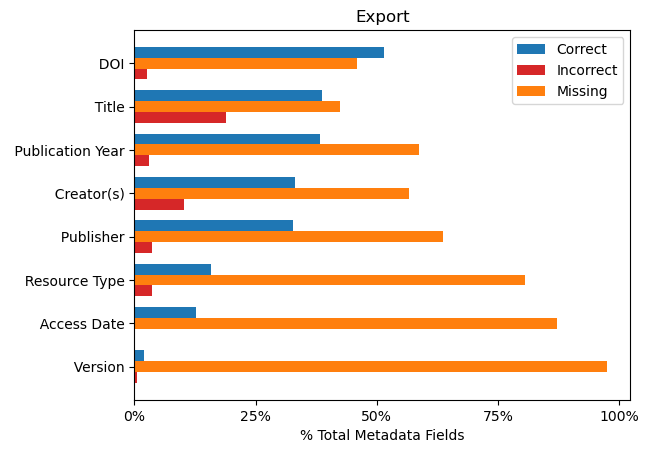

In [41]:
# Horizontal version

# Common parameters for graphing

x = np.arange(8) # of metadata fields
y = len(list_of_dfs)*len(zotero_plugin['Repository']) # total possible correct fields, len list of dfs * 14 repositories

## Start graphing IMPORT 

# first sort import
import_sort = store_data.loc['import-meta-DOI':'import-meta-version'].sort_values(by = 'sum_correct',ascending = True)

fig, ax = plt.subplots()

offset = 0.25
width = 0.25
ax.barh(x + offset, import_sort['sum_correct']/y*100, width, label = 'Correct', color = 'tab:blue')
ax.barh(x - offset, import_sort['sum_incorrect']/y*100, width, label = 'Incorrect', color = 'tab:red')
ax.barh(x, import_sort['sum_missing']/y*100, width, label = 'Missing', color = 'tab:orange')

# Get labels and clean them up
xlabels = import_sort.index #labels will be import_sort index DOI thru version. Prev used store_data index, import is 16:24
xlabels = xlabels.str.replace('-',' ') # replace hyphen
xlabels = xlabels.str.replace('import','') #don't include 'import'
xlabels = xlabels.str.replace('repo','Publisher')
xlabels = xlabels.str.replace('title','Title') 
xlabels = xlabels.str.replace('meta date','Publication Year') 
xlabels = xlabels.str.replace('authors','Creator(s)') 
xlabels = xlabels.str.replace('access date','Access Date') 
xlabels = xlabels.str.replace('type','Resource Type') 
xlabels = xlabels.str.replace('version','Version') 
xlabels = xlabels.str.replace('meta','') #don't include 'meta'

# set labels and ticks and axes
ax.set_yticks(x,xlabels) # Use xlabels or index
ax.set_xticks([0,(y/y)/4*100,(y/y)/2*100,3*(y/y)/4*100,y/y*100],ylabels)
ax.set_xlabel('% Total Metadata Fields')
ax.legend()
plt.title('Import')

plt.show()

# Save fig

fig.savefig((filepath+filename+filename2+'_import_horiz'+'.png'),dpi=300,bbox_inches='tight')


## Start graphing EXPORT 

# first sort export
export_sort = store_data.loc['export-meta-DOI':'export-meta-version'].sort_values(by = 'sum_correct',ascending = True)

fig, ax = plt.subplots()

offset = 0.25
width = 0.25
ax.barh(x + offset, (export_sort['sum_correct']/y*100), width, label = 'Correct', color = 'tab:blue')
ax.barh(x - offset, (export_sort['sum_incorrect']/y*100), width, label = 'Incorrect', color = 'tab:red')
ax.barh(x, (export_sort['sum_missing']/y*100), width, label = 'Missing', color = 'tab:orange')

# Get labels and clean them up
xlabels = export_sort.index #labels will be export_sort index DOI thru version. Prev used store_data index, export
xlabels = xlabels.str.replace('-',' ') # replace hyphen
xlabels = xlabels.str.replace('export','') #don't include 'export'
xlabels = xlabels.str.replace('repo','Publisher')
xlabels = xlabels.str.replace('title','Title') 
xlabels = xlabels.str.replace('meta date','Publication Year') 
xlabels = xlabels.str.replace('authors','Creator(s)') 
xlabels = xlabels.str.replace('access date','Access Date') 
xlabels = xlabels.str.replace('type','Resource Type') 
xlabels = xlabels.str.replace('version','Version') 
xlabels = xlabels.str.replace('meta','') #don't include 'meta'

# set labels and ticks and axes
ax.set_yticks(x,xlabels) # Use xlabels or index
ax.set_xticks([0,(y/y)/4*100,(y/y)/2*100,3*(y/y)/4*100,y/y*100],ylabels)
ax.set_xlabel('% Total Metadata Fields')
ax.legend()
plt.title('Export')

plt.show()

# Save fig
fig.savefig((filepath+filename+filename2+'_export_horiz'+'.png'),dpi=300,bbox_inches='tight')


# Compare Import and Export Accuracy

1. Quantify the difference between imports and exports. How much is dropped during export process vs what was already missing during import?
2. Filter import datasets for rows that have 0s. If the zeros changed to either a 1 or NaN in the export dataset, tell us (true/false?). Count all the T/Fs across each metadata field, e.g. ' 'access date was missed 90% of the time'' . (Do we want this for each reference manager or across all reference managers? )

Exclude bibtex, crosscite, bib_desk, repo_recommended_citation

In [268]:
zotero_plugin[ex_cols]

,export-meta-type,export-meta-authors,export-meta-title,export-meta-date,export-meta-DOI,export-meta-repo,export-meta-version,export-meta-access-date
0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN
2,NaN,1.0,0.0,NaN,0.0,NaN,NaN,NaN
3,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN
4,1.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN
5,NaN,NaN,1.0,NaN,1.0,NaN,NaN,0.0
6,1.0,1.0,1.0,0.0,0.0,0.0,NaN,NaN
7,NaN,1.0,0.0,0.0,0.0,NaN,1.0,NaN
8,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
9,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [201]:
zotero_plugin[im_cols]

,import-meta-type,import-meta-authors,import-meta-title,import-meta-date,import-meta-DOI,import-meta-repo,import-meta-version,import-meta-access-date
0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
1,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0
2,1.0,0.0,1.0,NaN,0.0,NaN,NaN,0.0
3,1.0,1.0,NaN,NaN,NaN,NaN,NaN,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
5,1.0,NaN,1.0,NaN,NaN,NaN,NaN,0.0
6,0.0,1.0,0.0,1.0,0.0,0.0,NaN,0.0
7,1.0,1.0,0.0,0.0,0.0,NaN,NaN,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0


In [378]:
# set parameters

# note order switched from previous use of this! to match list_of_indices and reference_manager_filenames
# endnote plugin is now before endnote wizard
# refworks plugin is now before refworks wizard
list_of_dfs = (zotero_plugin,zotero_wizard,sciwheel_plugin, sciwheel_wizard, endnote_plugin, endnote_wizard,  
               papers_plugin,papers_wizard,paperpile_plugin,paperpile_wizard,mendeley_plugin,
               mendeley_wizard, refworks_plugin, refworks_wizard)

list_of_indices = reference_manager_filenames[2:4]+reference_manager_filenames[5:7]+reference_manager_filenames[8:-1]



# init array to store counts for each column of import/export difference array
store_change_counts = np.zeros(8) # array
temp_store = np.empty(8)

for i in list_of_dfs: # run thru all dfs except bibtex, repo_recommended_citation, bib_desk, crosscite
    
    # convert import and export columns in i to arrays
    import_numpy = i[im_cols].to_numpy(na_value = np.nan)
    export_numpy = i[ex_cols].to_numpy(na_value = np.nan)
    
    # convert values in export array to make the math easier
    export_numpy[np.isnan(export_numpy)] = 2 # convert nans to 2s
    export_numpy[export_numpy == 0] = np.nan # convert 0s to nans
    
    # subtract import from export to get a difference array
    change = export_numpy - import_numpy
    
    # Make a boolean mask of nans in change (array)
    boolarr = np.isnan(change)
    
    # Create array to store all non-nan values
    for k in range(8):
        temp_store[k] = 14 - boolarr[:,k].sum()
    
    # add each df non-nan values to dataframe
    store_change_counts = np.vstack([store_change_counts,temp_store])
    
    print(temp_store)
    
# Set columns according to metadata fields
data_columns = ['Resource Type','Author','Title','Publication Year','DOI','Publisher','Version','Access Date']

# Set up a dataframe to store results
store_change_counts = np.delete(store_change_counts, (0), axis=0) # delete first row of this array due to appending causing 15 rows

change_counts_df = pd.DataFrame(store_change_counts, index = list_of_indices, columns = data_columns)
    
    

[ 7.  4.  4.  0.  0.  0.  0. 12.]
[ 6.  4.  4.  1.  0.  1.  0. 14.]
[0. 2. 4. 2. 2. 2. 0. 0.]
[0. 2. 0. 0. 0. 0. 0. 0.]
[5. 2. 0. 3. 1. 2. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 6. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[9. 3. 7. 0. 0. 1. 0. 4.]
[2. 0. 2. 0. 0. 0. 0. 1.]
[0. 2. 8. 0. 0. 1. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[4. 0. 2. 0. 0. 1. 0. 3.]
[4. 1. 0. 0. 0. 0. 0. 0.]


In [380]:
change_counts_df

,Resource Type,Author,Title,Publication Year,DOI,Publisher,Version,Access Date
Zotero-plugin,7.0,4.0,4.0,0.0,0.0,0.0,0.0,12.0
Zotero-wizard,6.0,4.0,4.0,1.0,0.0,1.0,0.0,14.0
Sciwheel-plugin,0.0,2.0,4.0,2.0,2.0,2.0,0.0,0.0
SciWheel-wizard,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
Endnote-plugin,5.0,2.0,0.0,3.0,1.0,2.0,0.0,0.0
Endnote-wizard,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Papers-plugin,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0
Papers-wizard,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Paperpile-plugin,9.0,3.0,7.0,0.0,0.0,1.0,0.0,4.0
Paperpile-wizard,2.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0.5, 1, 'Resource Type'),
  Text(1.5, 1, 'Author'),
  Text(2.5, 1, 'Title'),
  Text(3.5, 1, 'Publication Year'),
  Text(4.5, 1, 'DOI'),
  Text(5.5, 1, 'Publisher'),
  Text(6.5, 1, 'Version'),
  Text(7.5, 1, 'Access Date')])

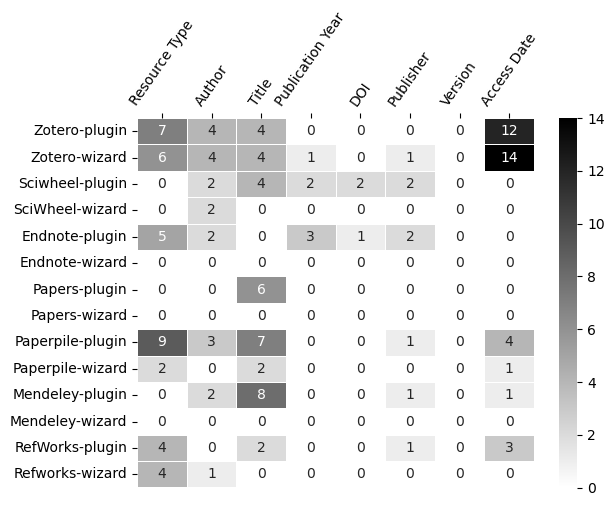

In [392]:
ax = sns.heatmap(change_counts_df, annot=True, vmin = 0, vmax = 14, cmap = 'binary',linewidth=.5)
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
plt.xticks(rotation=55)


In [393]:
# This isn't needed as I went a different way 
list_of_counts_as_dict = []
for i in range(len(change[0])):
    print('counting over column ' + str(i) + '...')
    unique, counts = np.unique(change[:, i], return_counts=True)
    list_of_counts_as_dict.append(dict(zip(unique, counts)))

list_of_counts_as_dict

counting over column 0...
counting over column 1...
counting over column 2...
counting over column 3...
counting over column 4...
counting over column 5...
counting over column 6...
counting over column 7...


In [394]:
# test_df = (zotero_plugin[ex_cols] == zotero_wizard[ex_cols]) # only works for same column names

# print(test_df)

# print(test_df['export-meta-authors'].sum())

# diff = zotero_plugin[im_cols].compare(zotero_plugin[ex_cols]) # only works for same column names. 

# zotero_plugin['import-meta-type'].isin(zotero_plugin['export-meta-type']) # this doesn't compare row to row

column_change_dict = {'export-meta-type' : 'import-meta-type',
                     'export-meta-authors' : 'import-meta-authors',
                     'export-meta-title' : 'import-meta-title',
                     'export-meta-date' : 'import-meta-date',
                     'export-meta-DOI': 'import-meta-DOI', 
                     'export-meta-repo' : 'import-meta-repo',
                     'export-meta-version' : 'import-meta-version',
                     'export-meta-access-date' : 'import-meta-access-date'}

copy_df = zotero_plugin[ex_cols].rename(columns = column_change_dict)
copy_df.head()

# diff = ((zotero_plugin[im_cols]) == copy_df) # this compares ALL values (e.g. 1s too)

diff = ((zotero_plugin[im_cols]==0) == copy_df) # this should mask the import columns first by correct values.

## HAVING ISSUES WITH THIS MASKING!! EXAMINE TITLE CLOSELY TOMORROW
print(diff)

diff.sum()

    import-meta-type  import-meta-authors  import-meta-title  \
0              False                False              False   
1              False                False              False   
2              False                 True               True   
3              False                False              False   
4               True                False               True   
5              False                False              False   
6               True                False               True   
7              False                False              False   
8              False                False              False   
9              False                False              False   
10             False                False               True   
11             False                False              False   
12             False                False              False   
13             False                False              False   

    import-meta-date  import-meta-DOI  

import-meta-type           2
import-meta-authors        1
import-meta-title          4
import-meta-date           1
import-meta-DOI            0
import-meta-repo           0
import-meta-version        0
import-meta-access-date    0
dtype: int64